# libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score 

# analyze data

In [2]:
data = pd.read_csv('C:\\Users\\LavaN-32428068\\Desktop\\python test\\data of diabetes\\diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df = pd.DataFrame(data.drop('Pregnancies',axis=1)) #bekhater in ke sotoon pregnancies peyvaste nist
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [4]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [6]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

C:\Users\LavaN-32428068\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


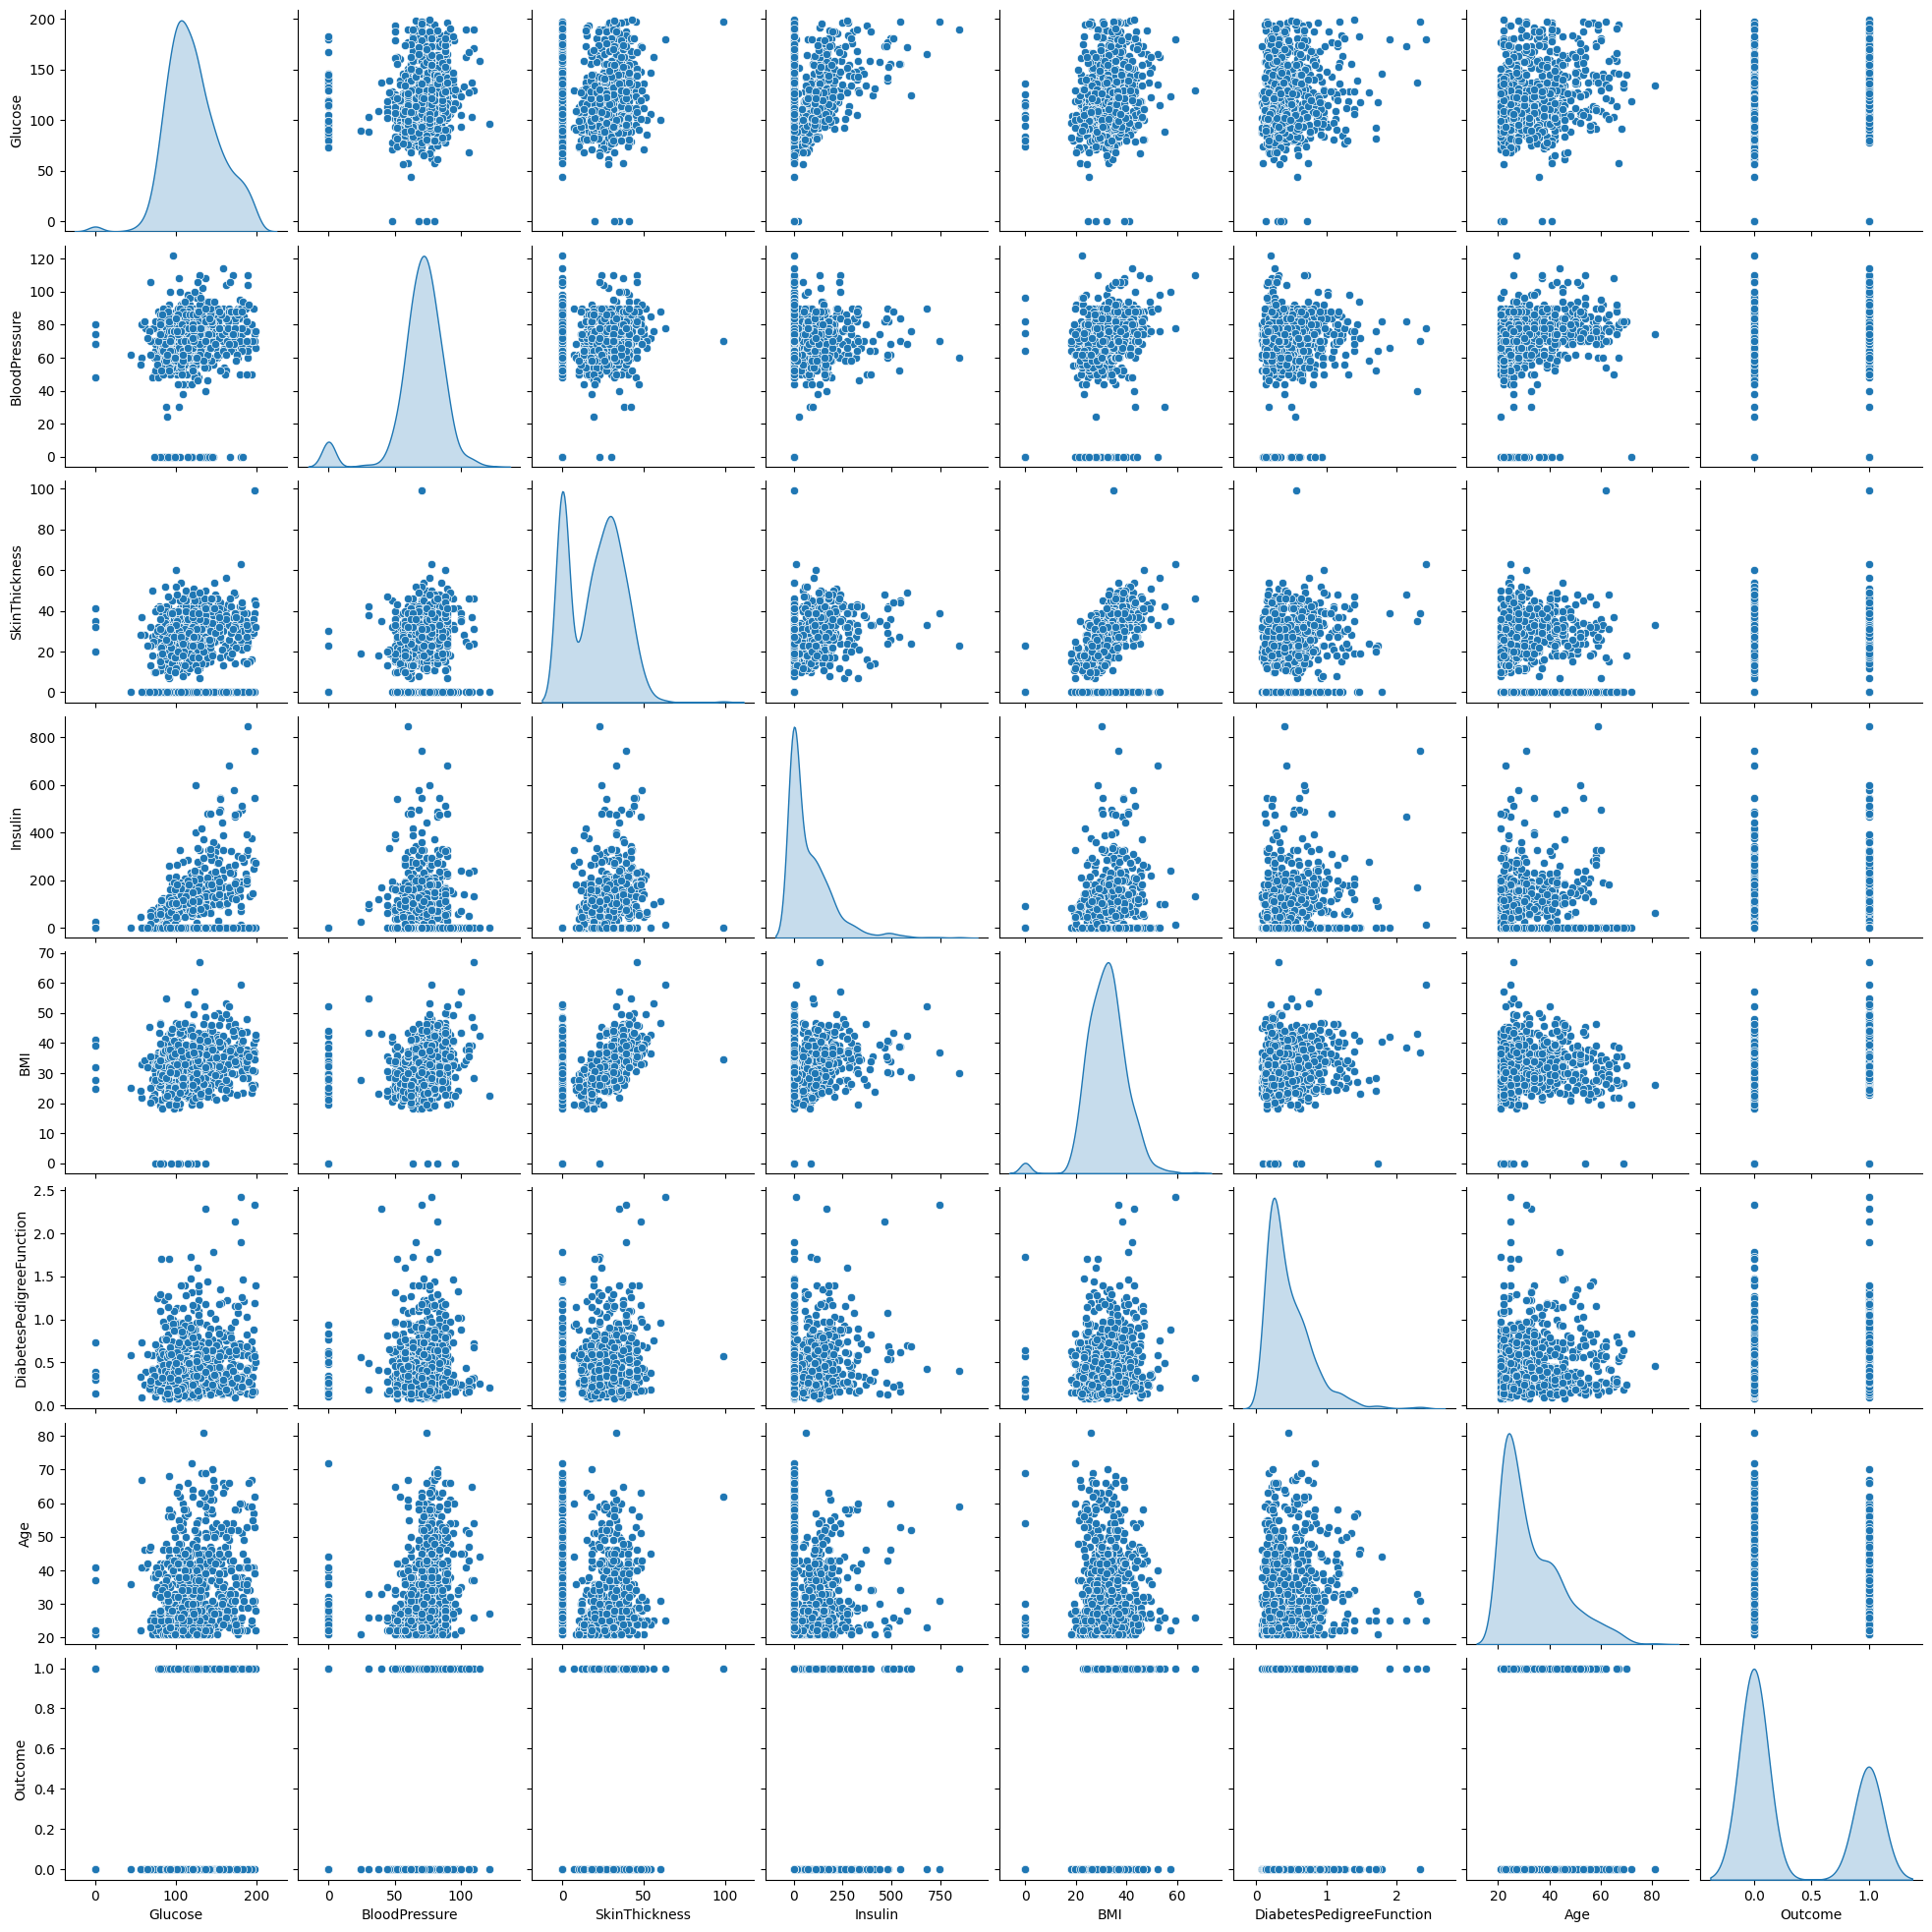

In [7]:
sns.pairplot(data=df, diag_kind='kde')
#hamoontor ke dar shekle payin mibinim scatter be dard in data ha nemikhore va bayad az ploti estefade konim ke be ma data haro dorost neshone bede

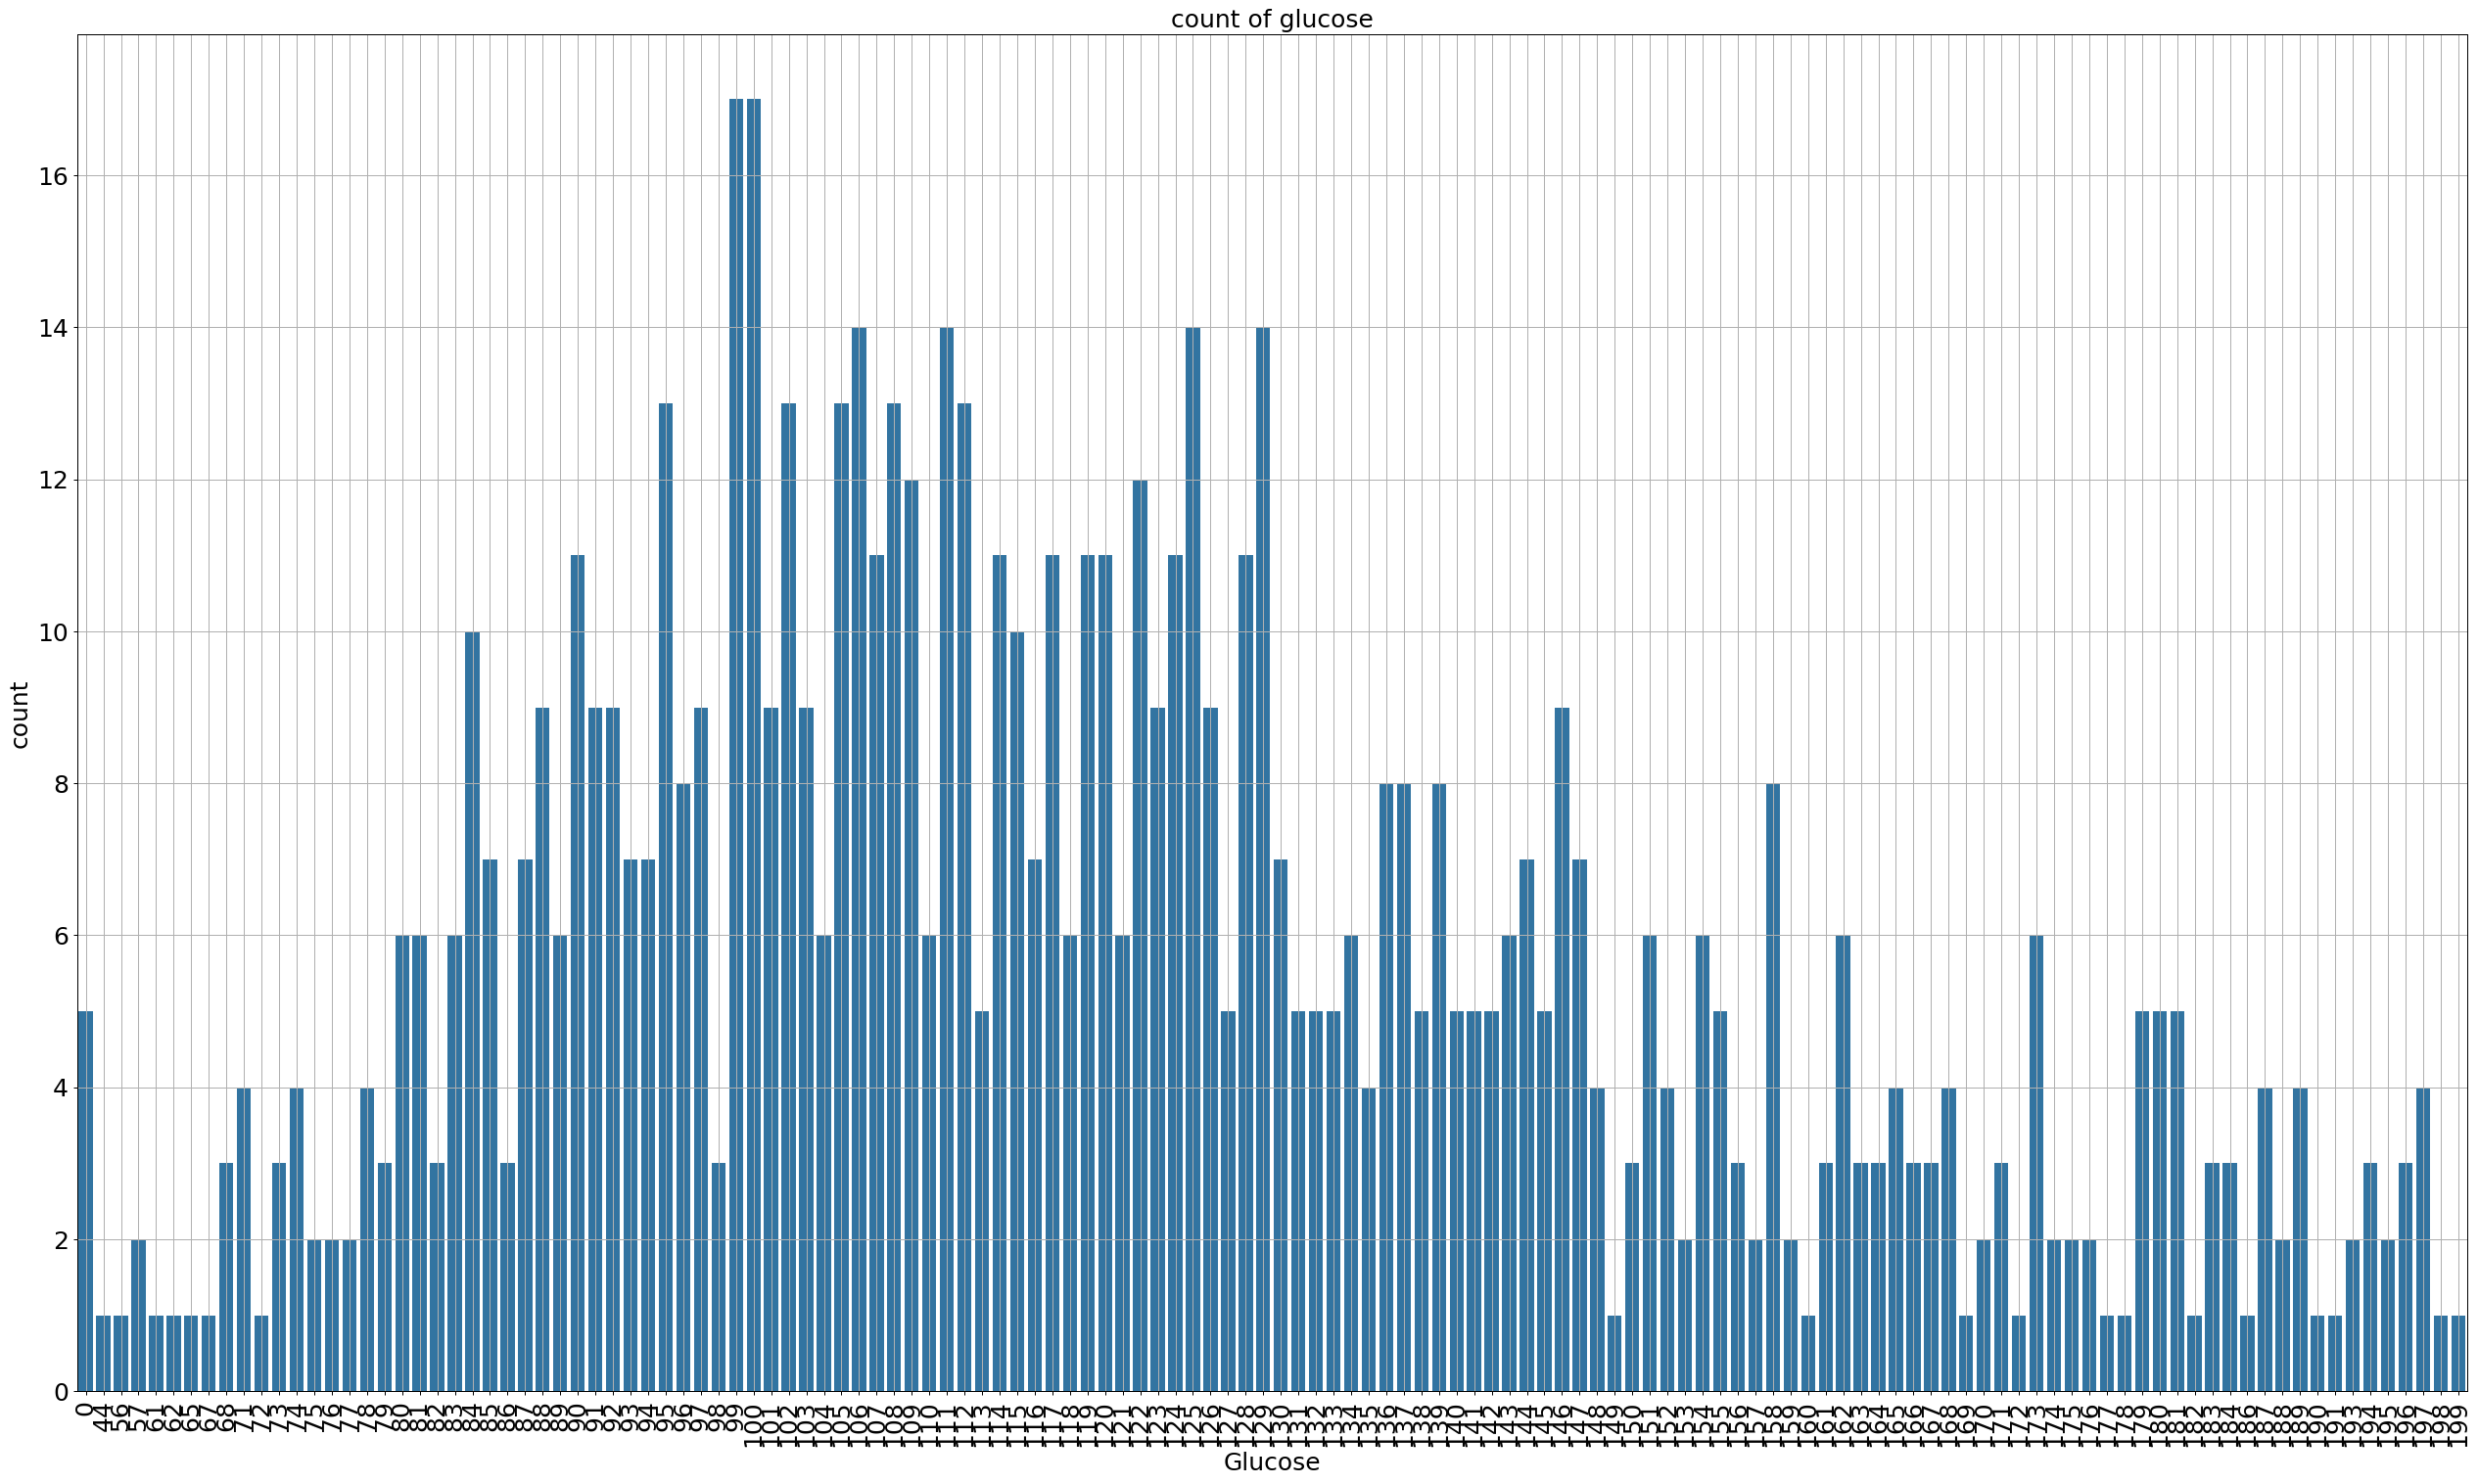

In [8]:
plt.figure(figsize=(35,20),dpi=90)
ax = sns.countplot (x='Glucose',data=df)
plt.xticks(rotation=90 ,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Glucose',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('count of glucose',fontsize=20)
plt.grid()
#hamontor ke mibinid nemodares halate tozie normal ya hamoon tozie gussian dare

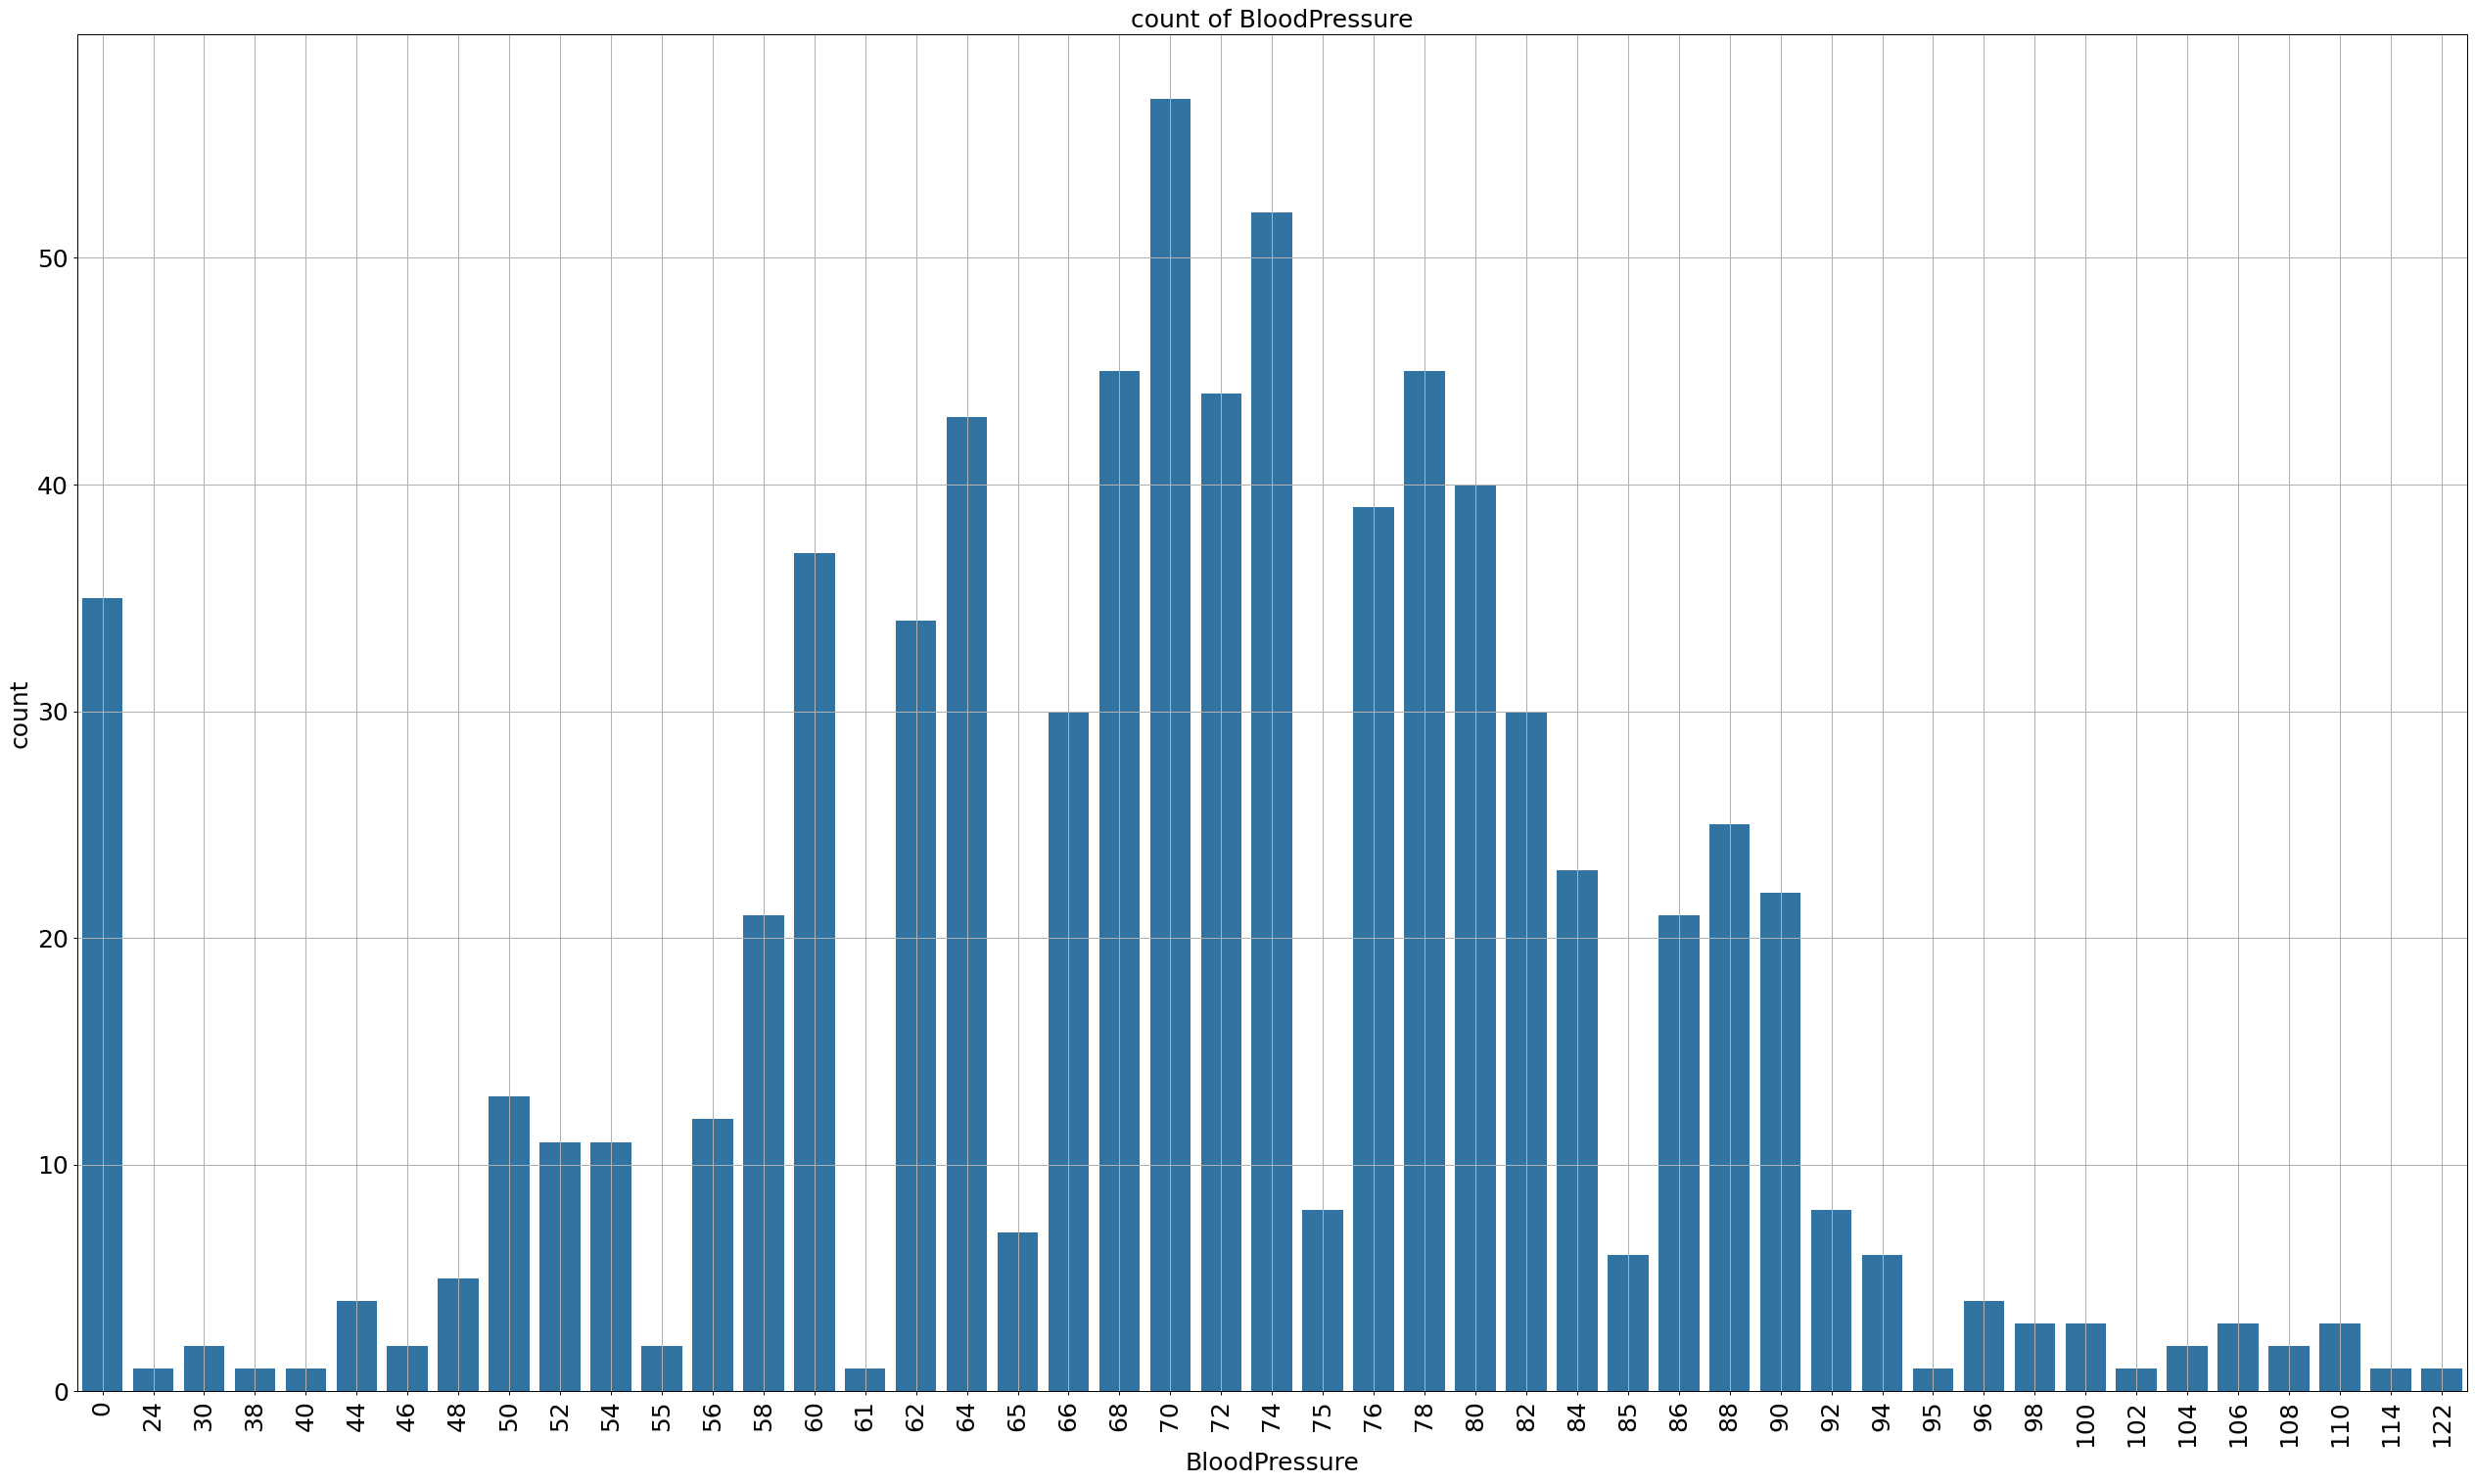

In [9]:
plt.figure(figsize=(35,20),dpi=90)
ax = sns.countplot (x='BloodPressure',data=df)
plt.xticks(rotation=90 ,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('BloodPressure',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('count of BloodPressure',fontsize=20)
plt.grid()

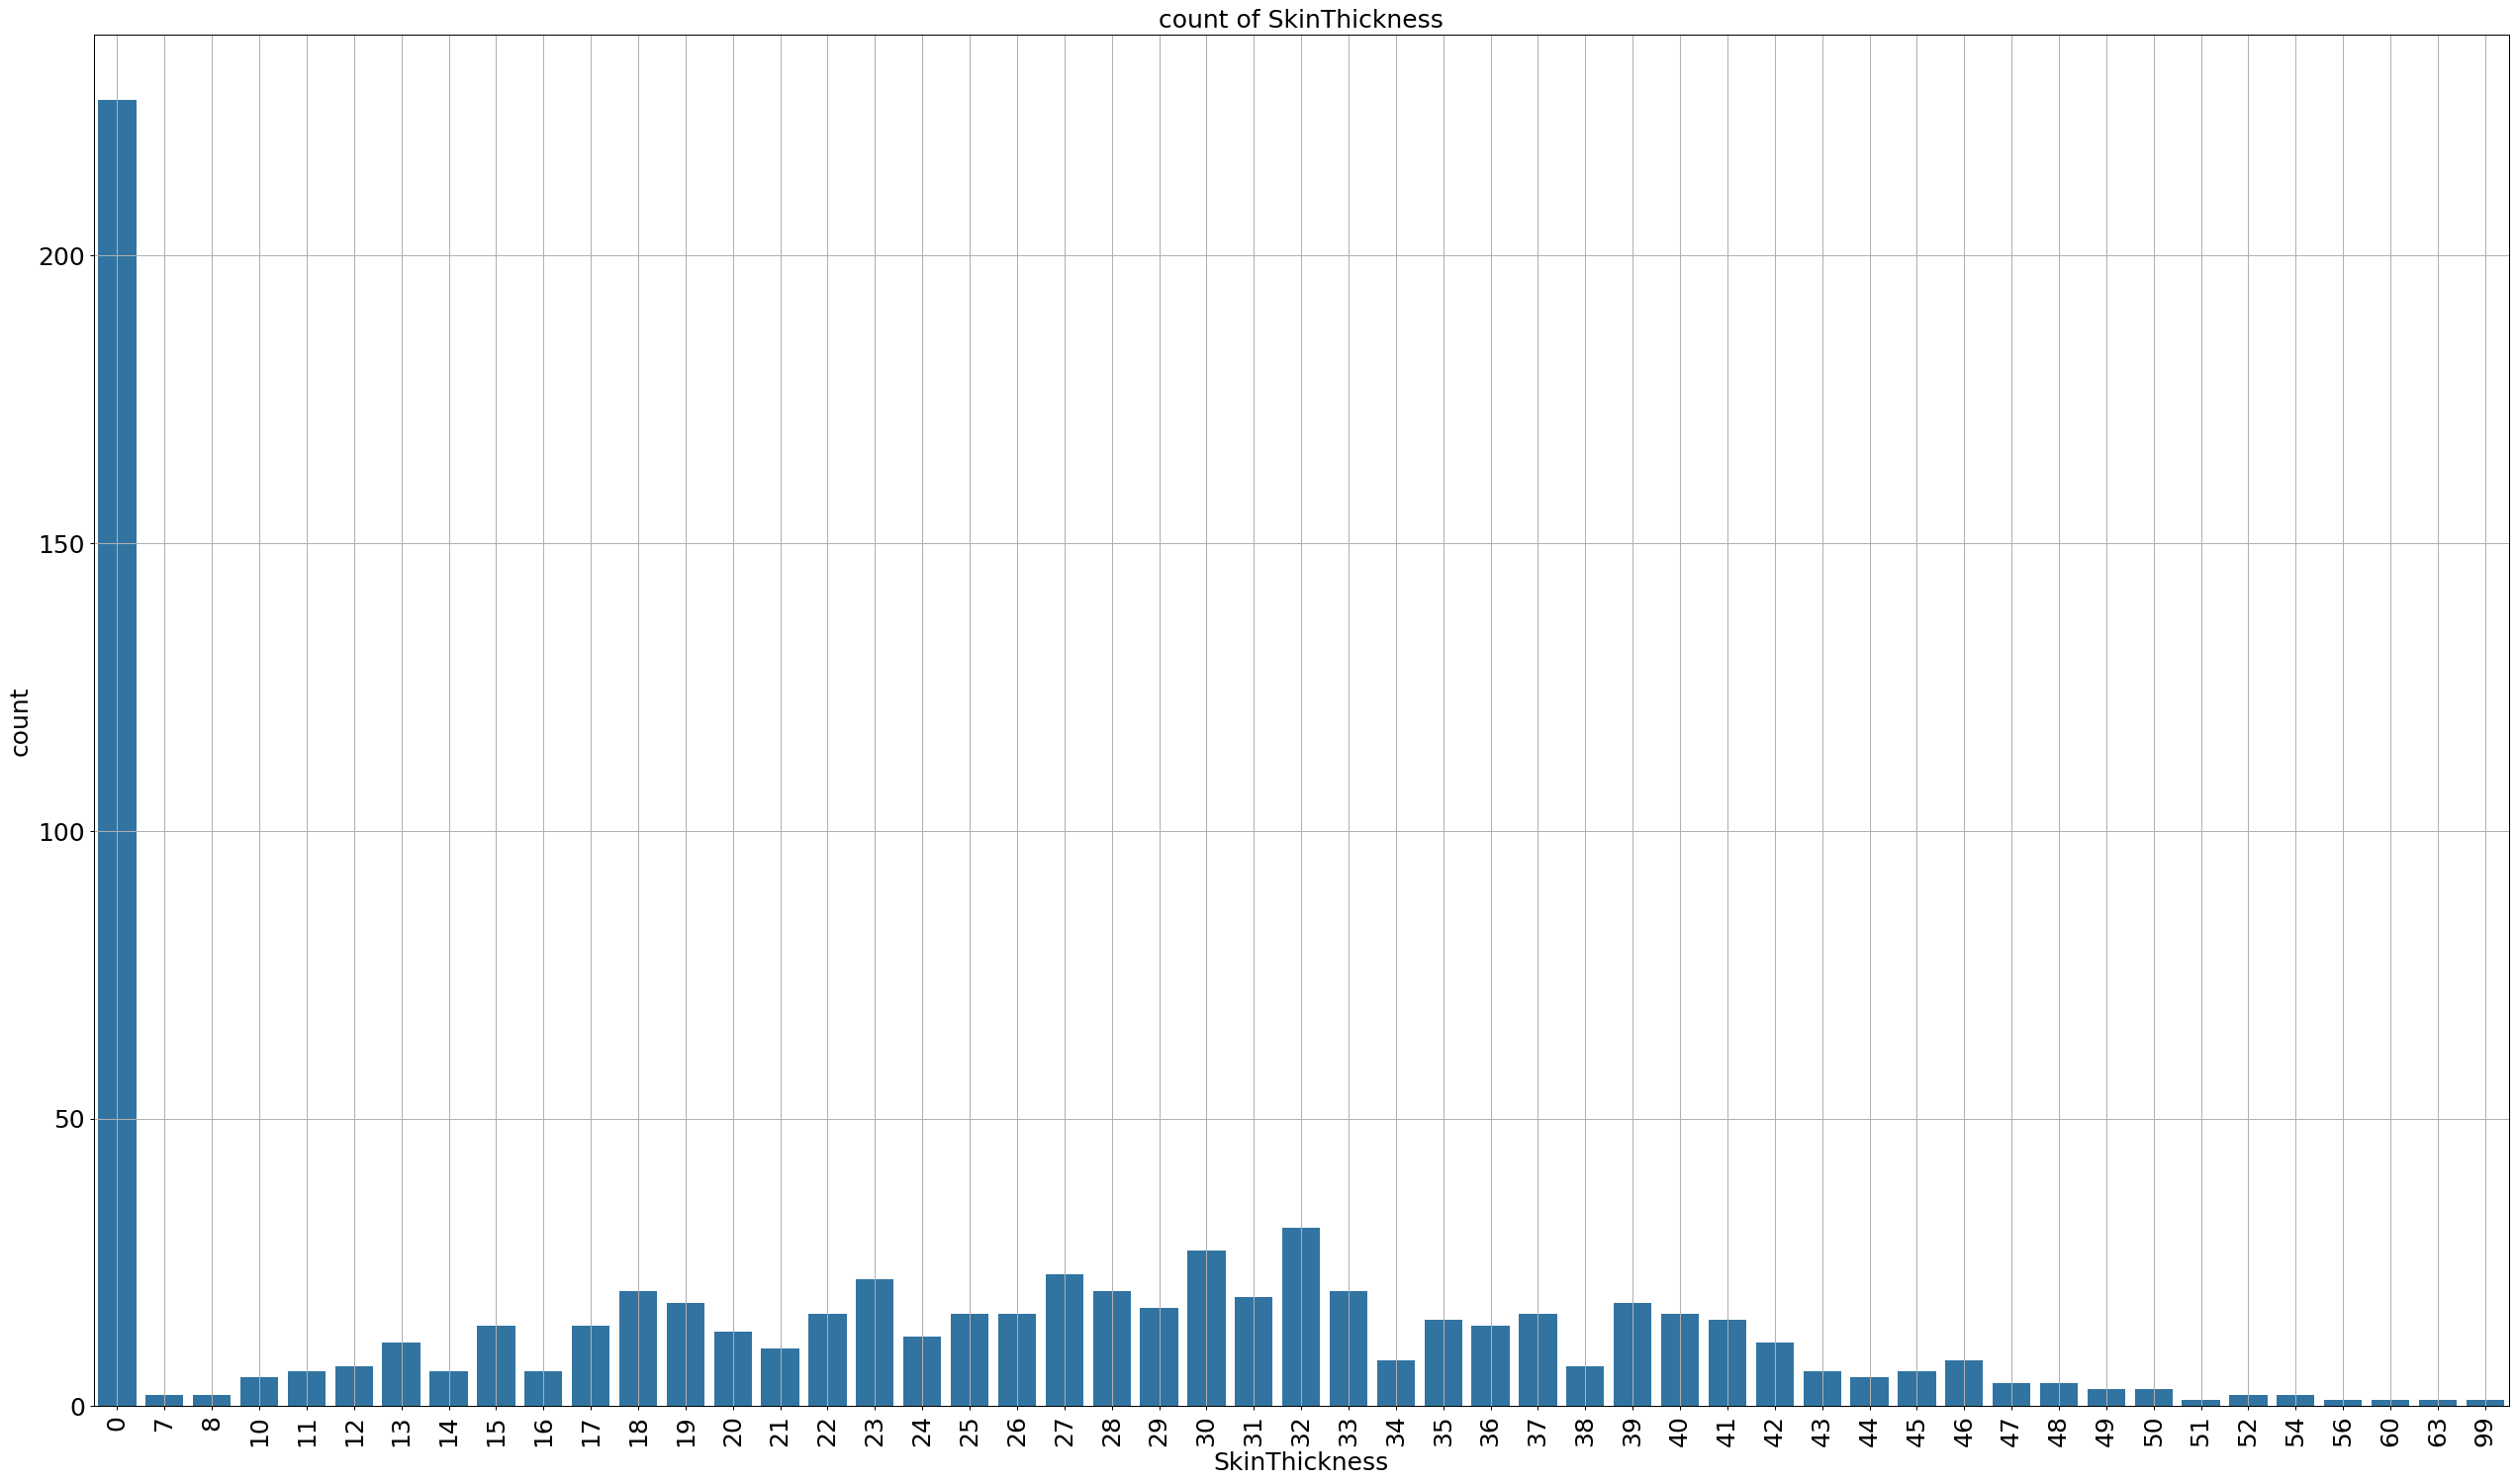

In [10]:
plt.figure(figsize=(35,20),dpi=90)
ax = sns.countplot (x='SkinThickness',data=df)
plt.xticks(rotation=90 ,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('SkinThickness',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('count of SkinThickness',fontsize=20)
plt.grid()
#data haye rooye 0 bayad hazf shan chon zekhamat poost 0 nadarim

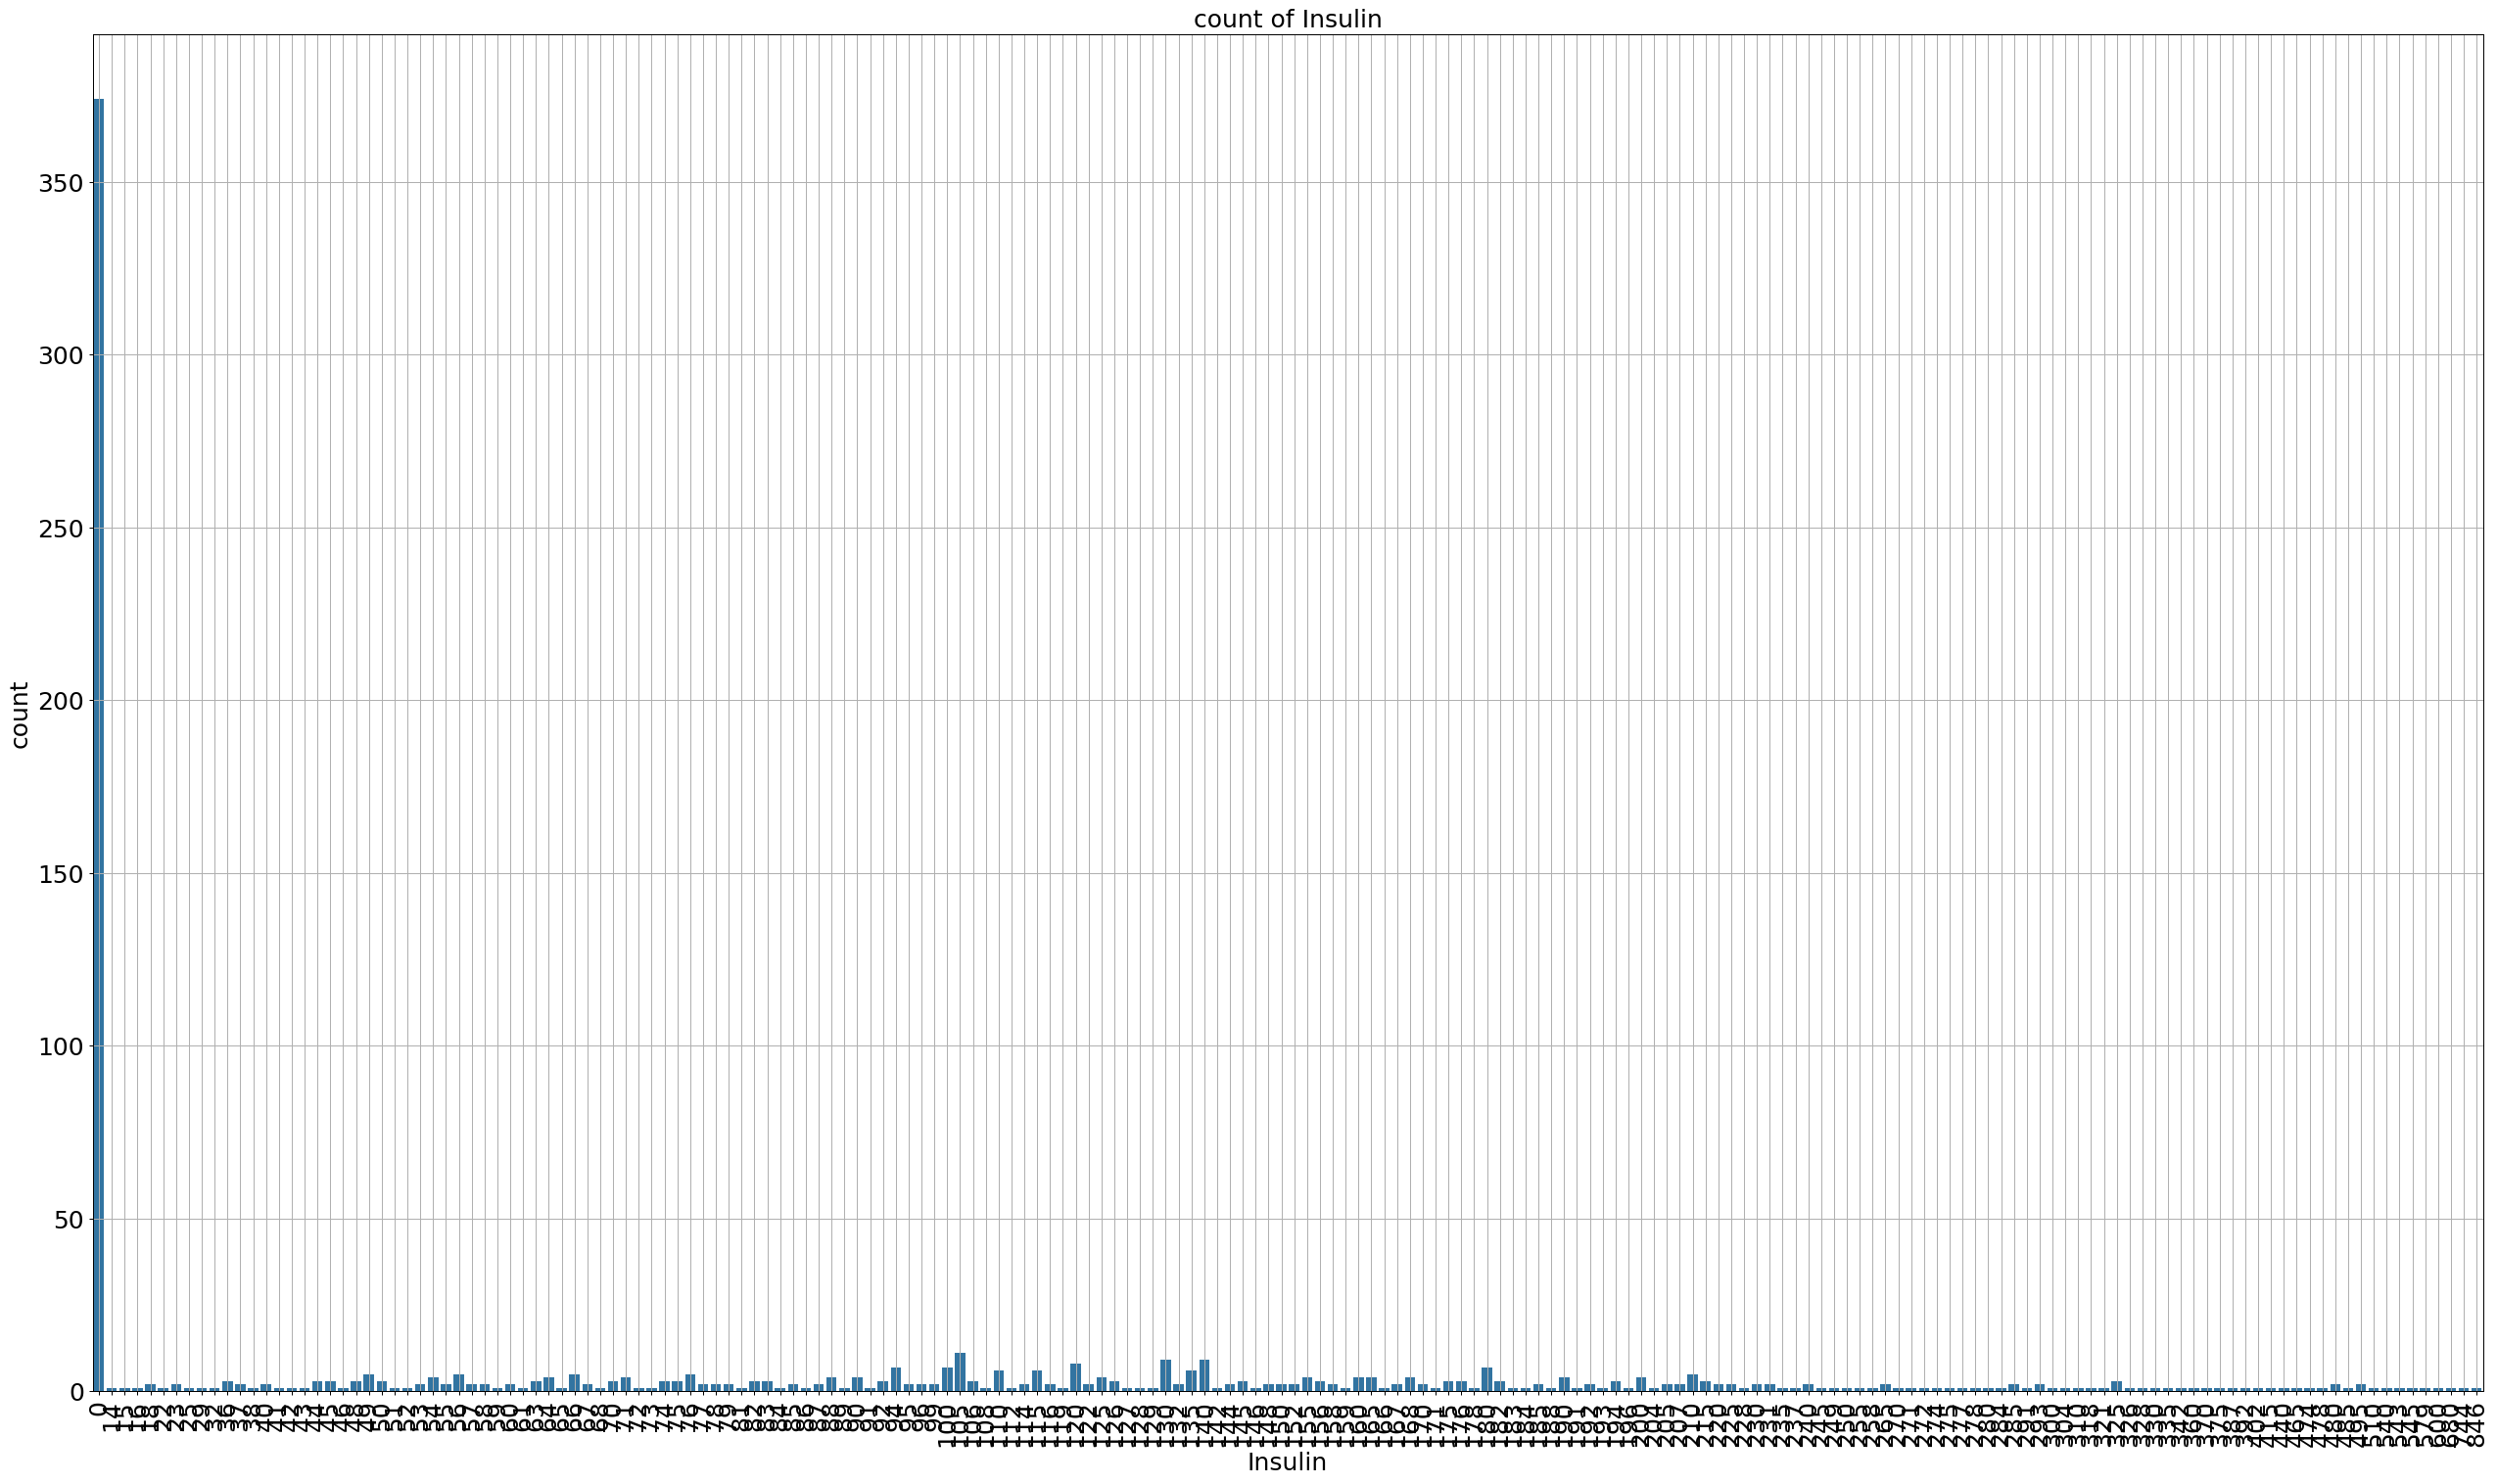

In [11]:
plt.figure(figsize=(35,20),dpi=90)
ax = sns.countplot (x='Insulin',data=df)
plt.xticks(rotation=90 ,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Insulin',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('count of Insulin',fontsize=20)
plt.grid()

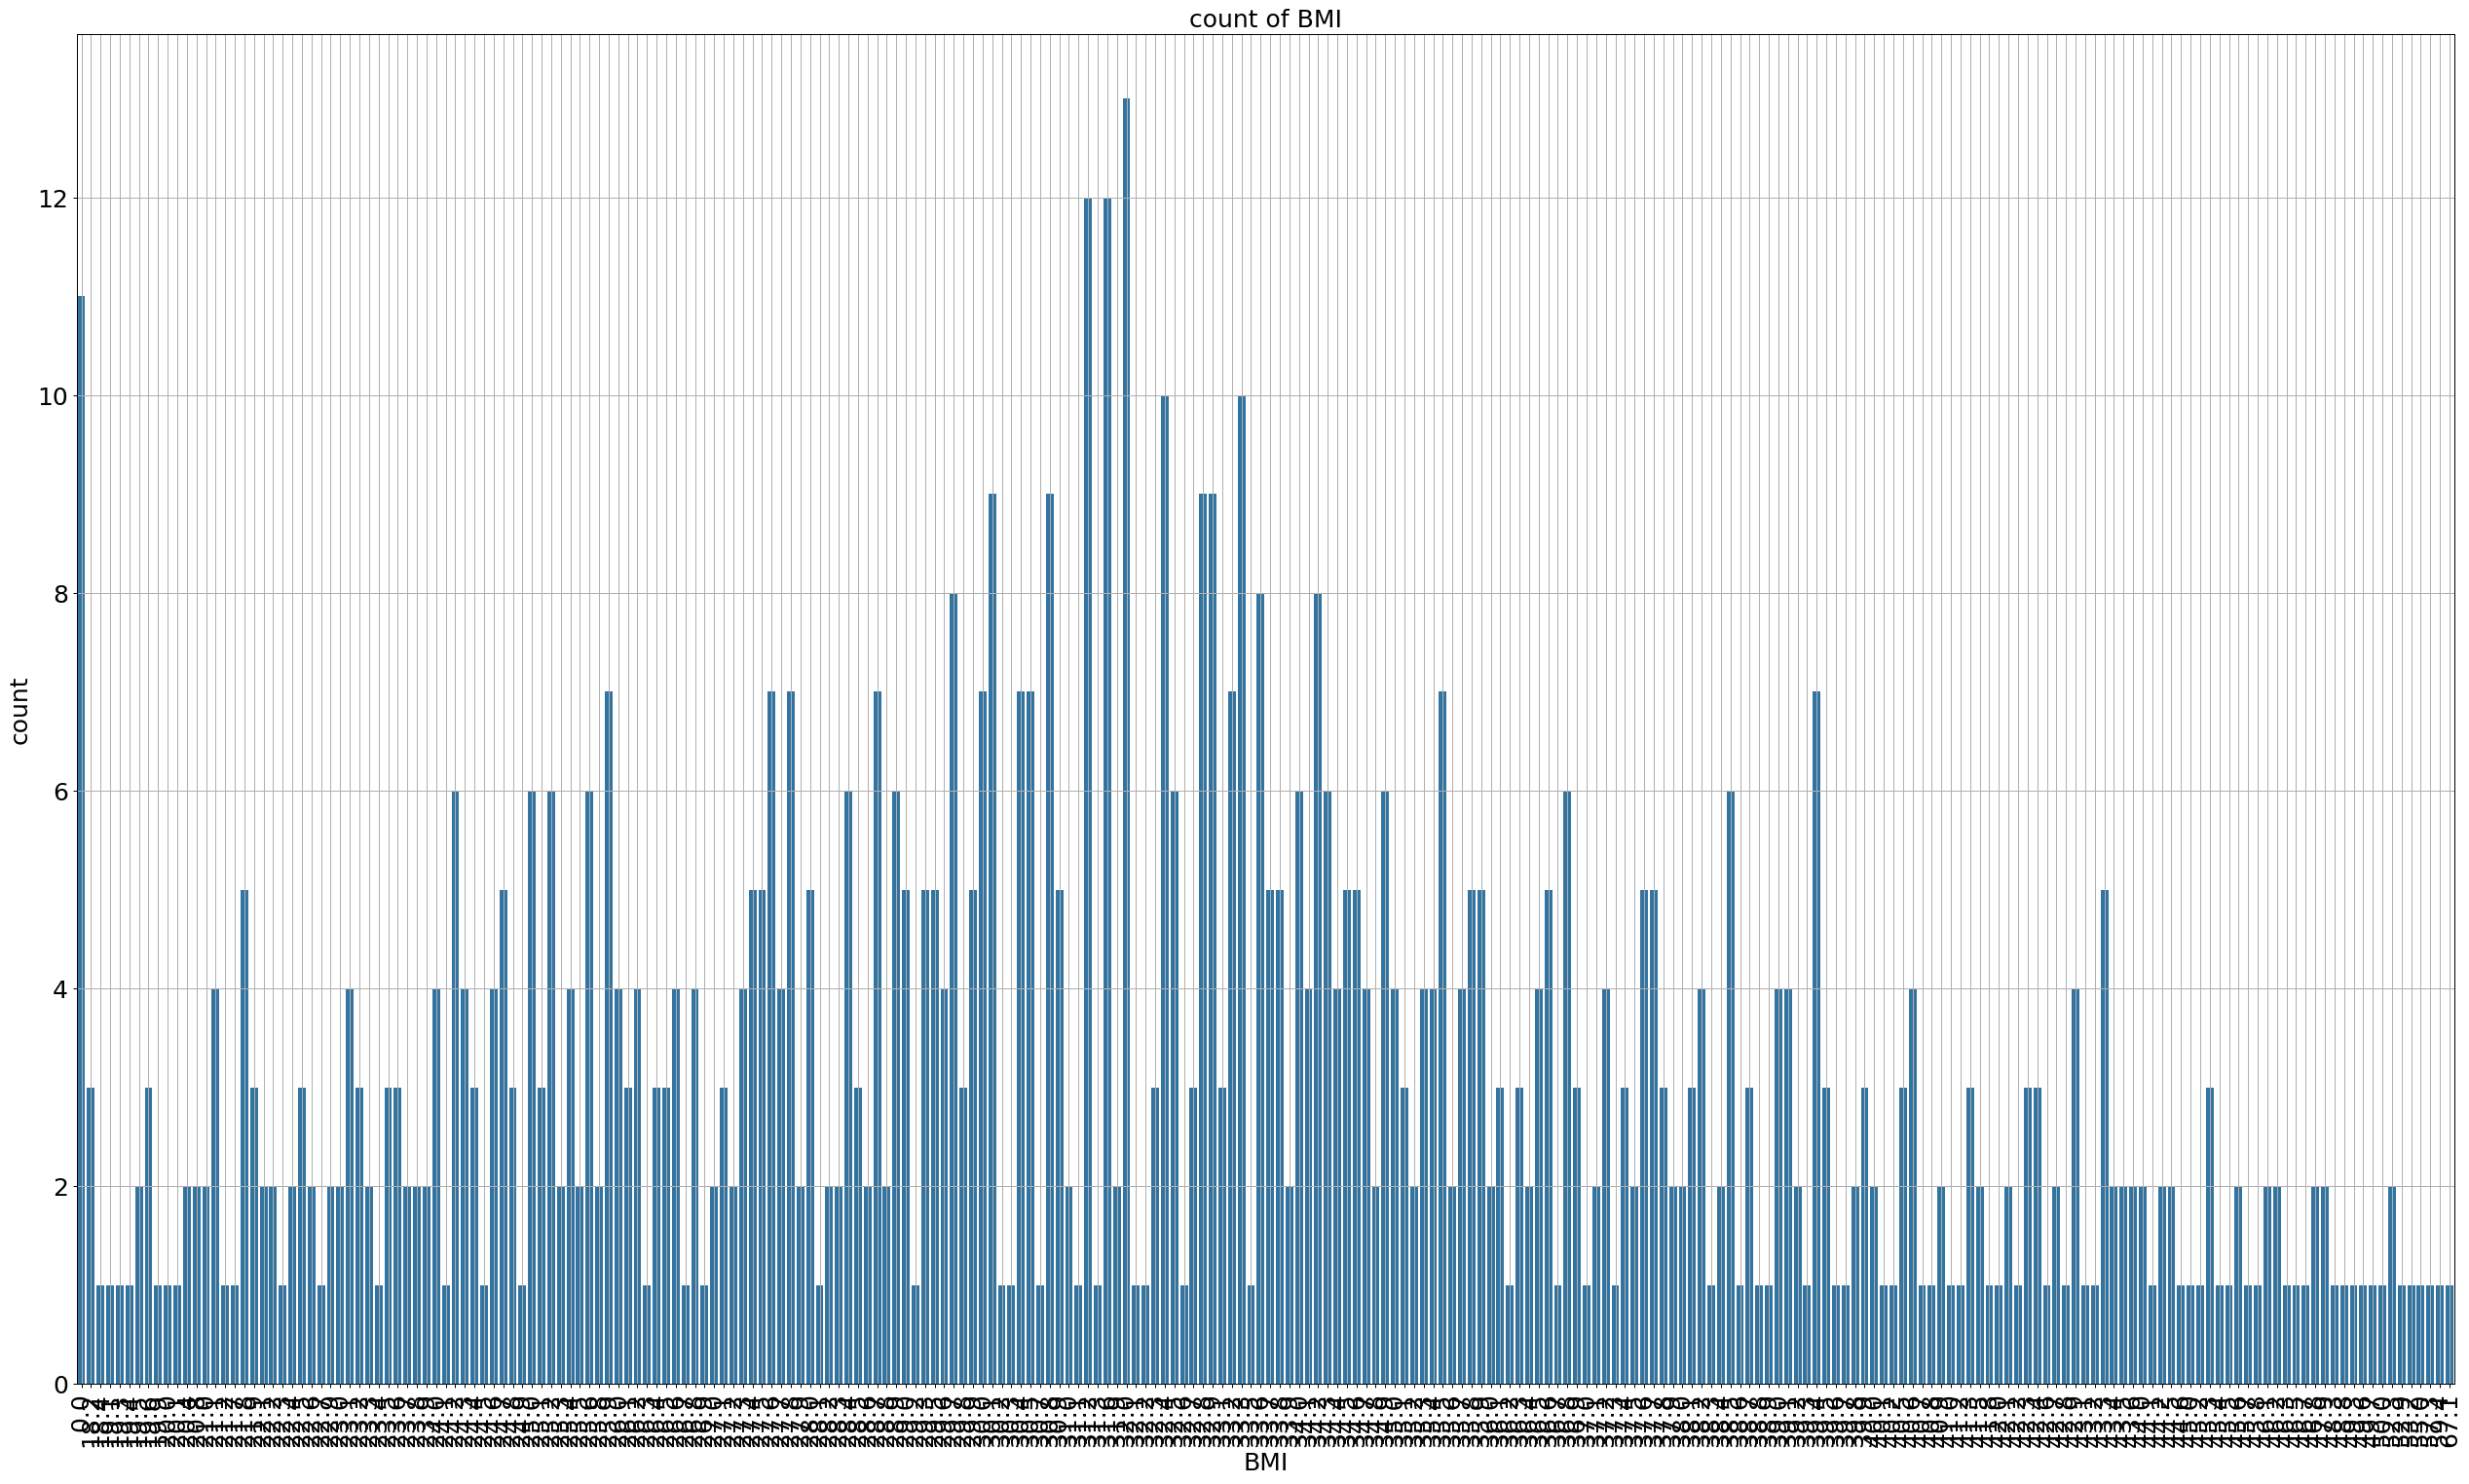

In [12]:
plt.figure(figsize=(35,20),dpi=90)
ax = sns.countplot (x='BMI',data=df)
plt.xticks(rotation=90 ,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('BMI',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('count of BMI',fontsize=20)
plt.grid()

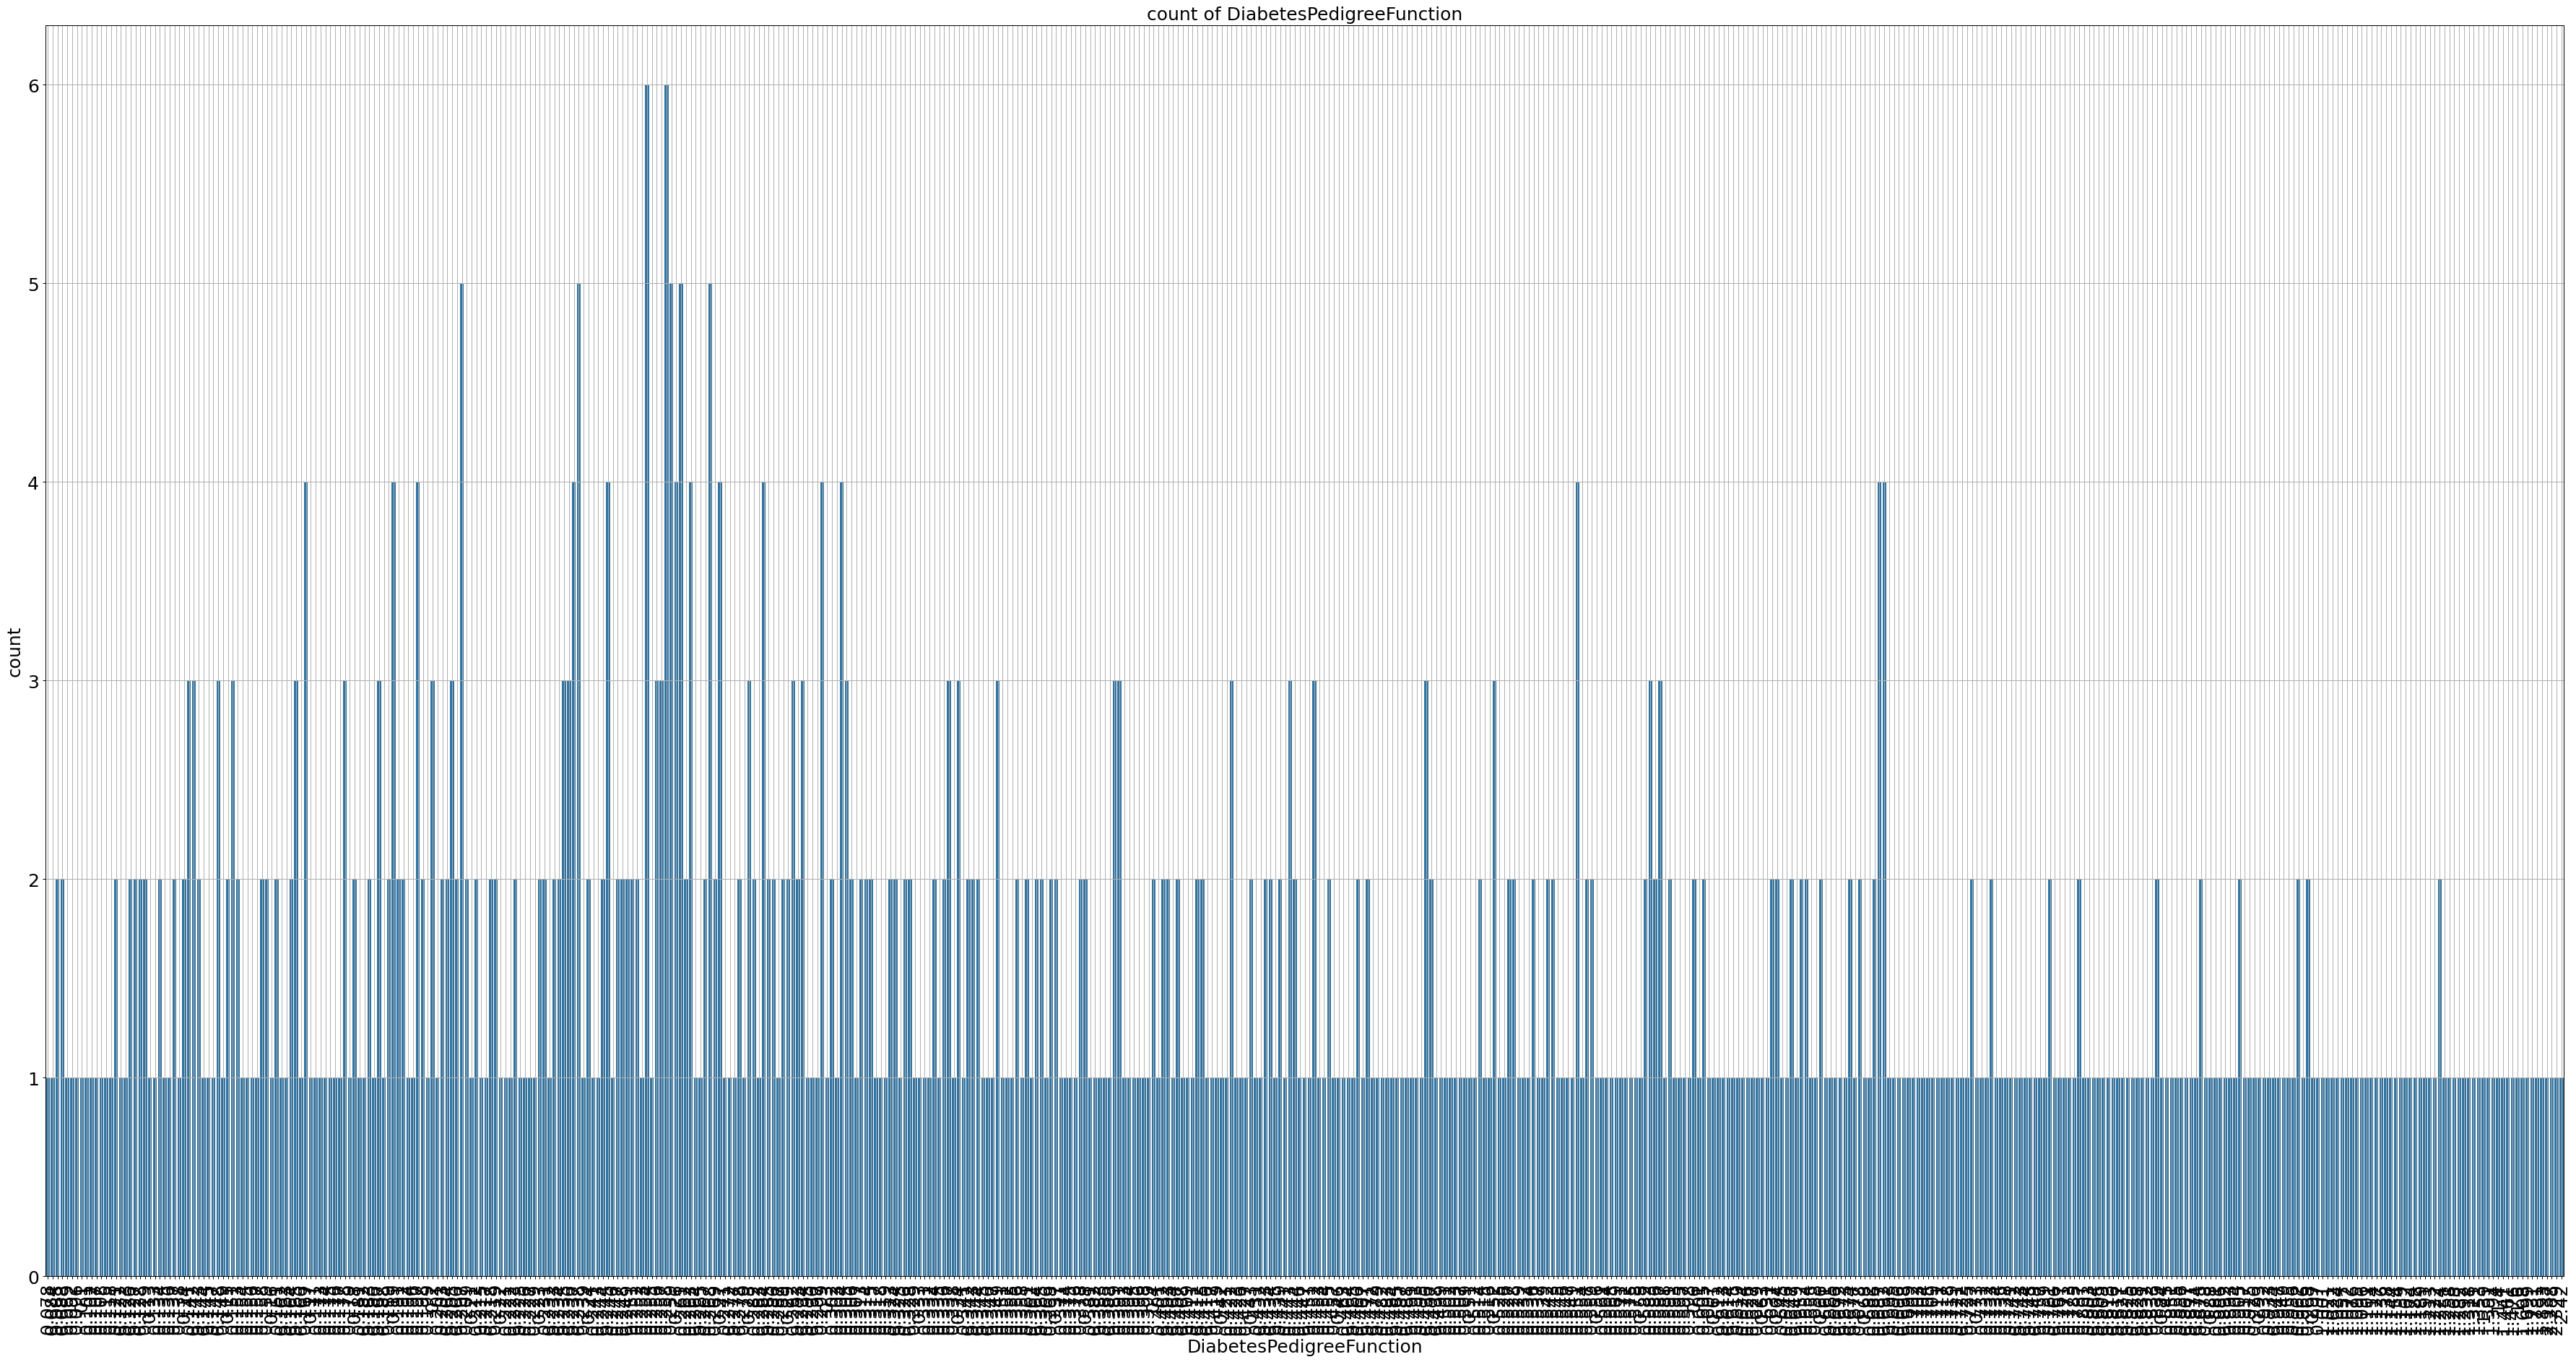

In [13]:
plt.figure(figsize=(50,25),dpi=90)
ax = sns.countplot (x='DiabetesPedigreeFunction',data=df)
plt.xticks(rotation=90 ,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('DiabetesPedigreeFunction',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('count of DiabetesPedigreeFunction',fontsize=20)
plt.grid()

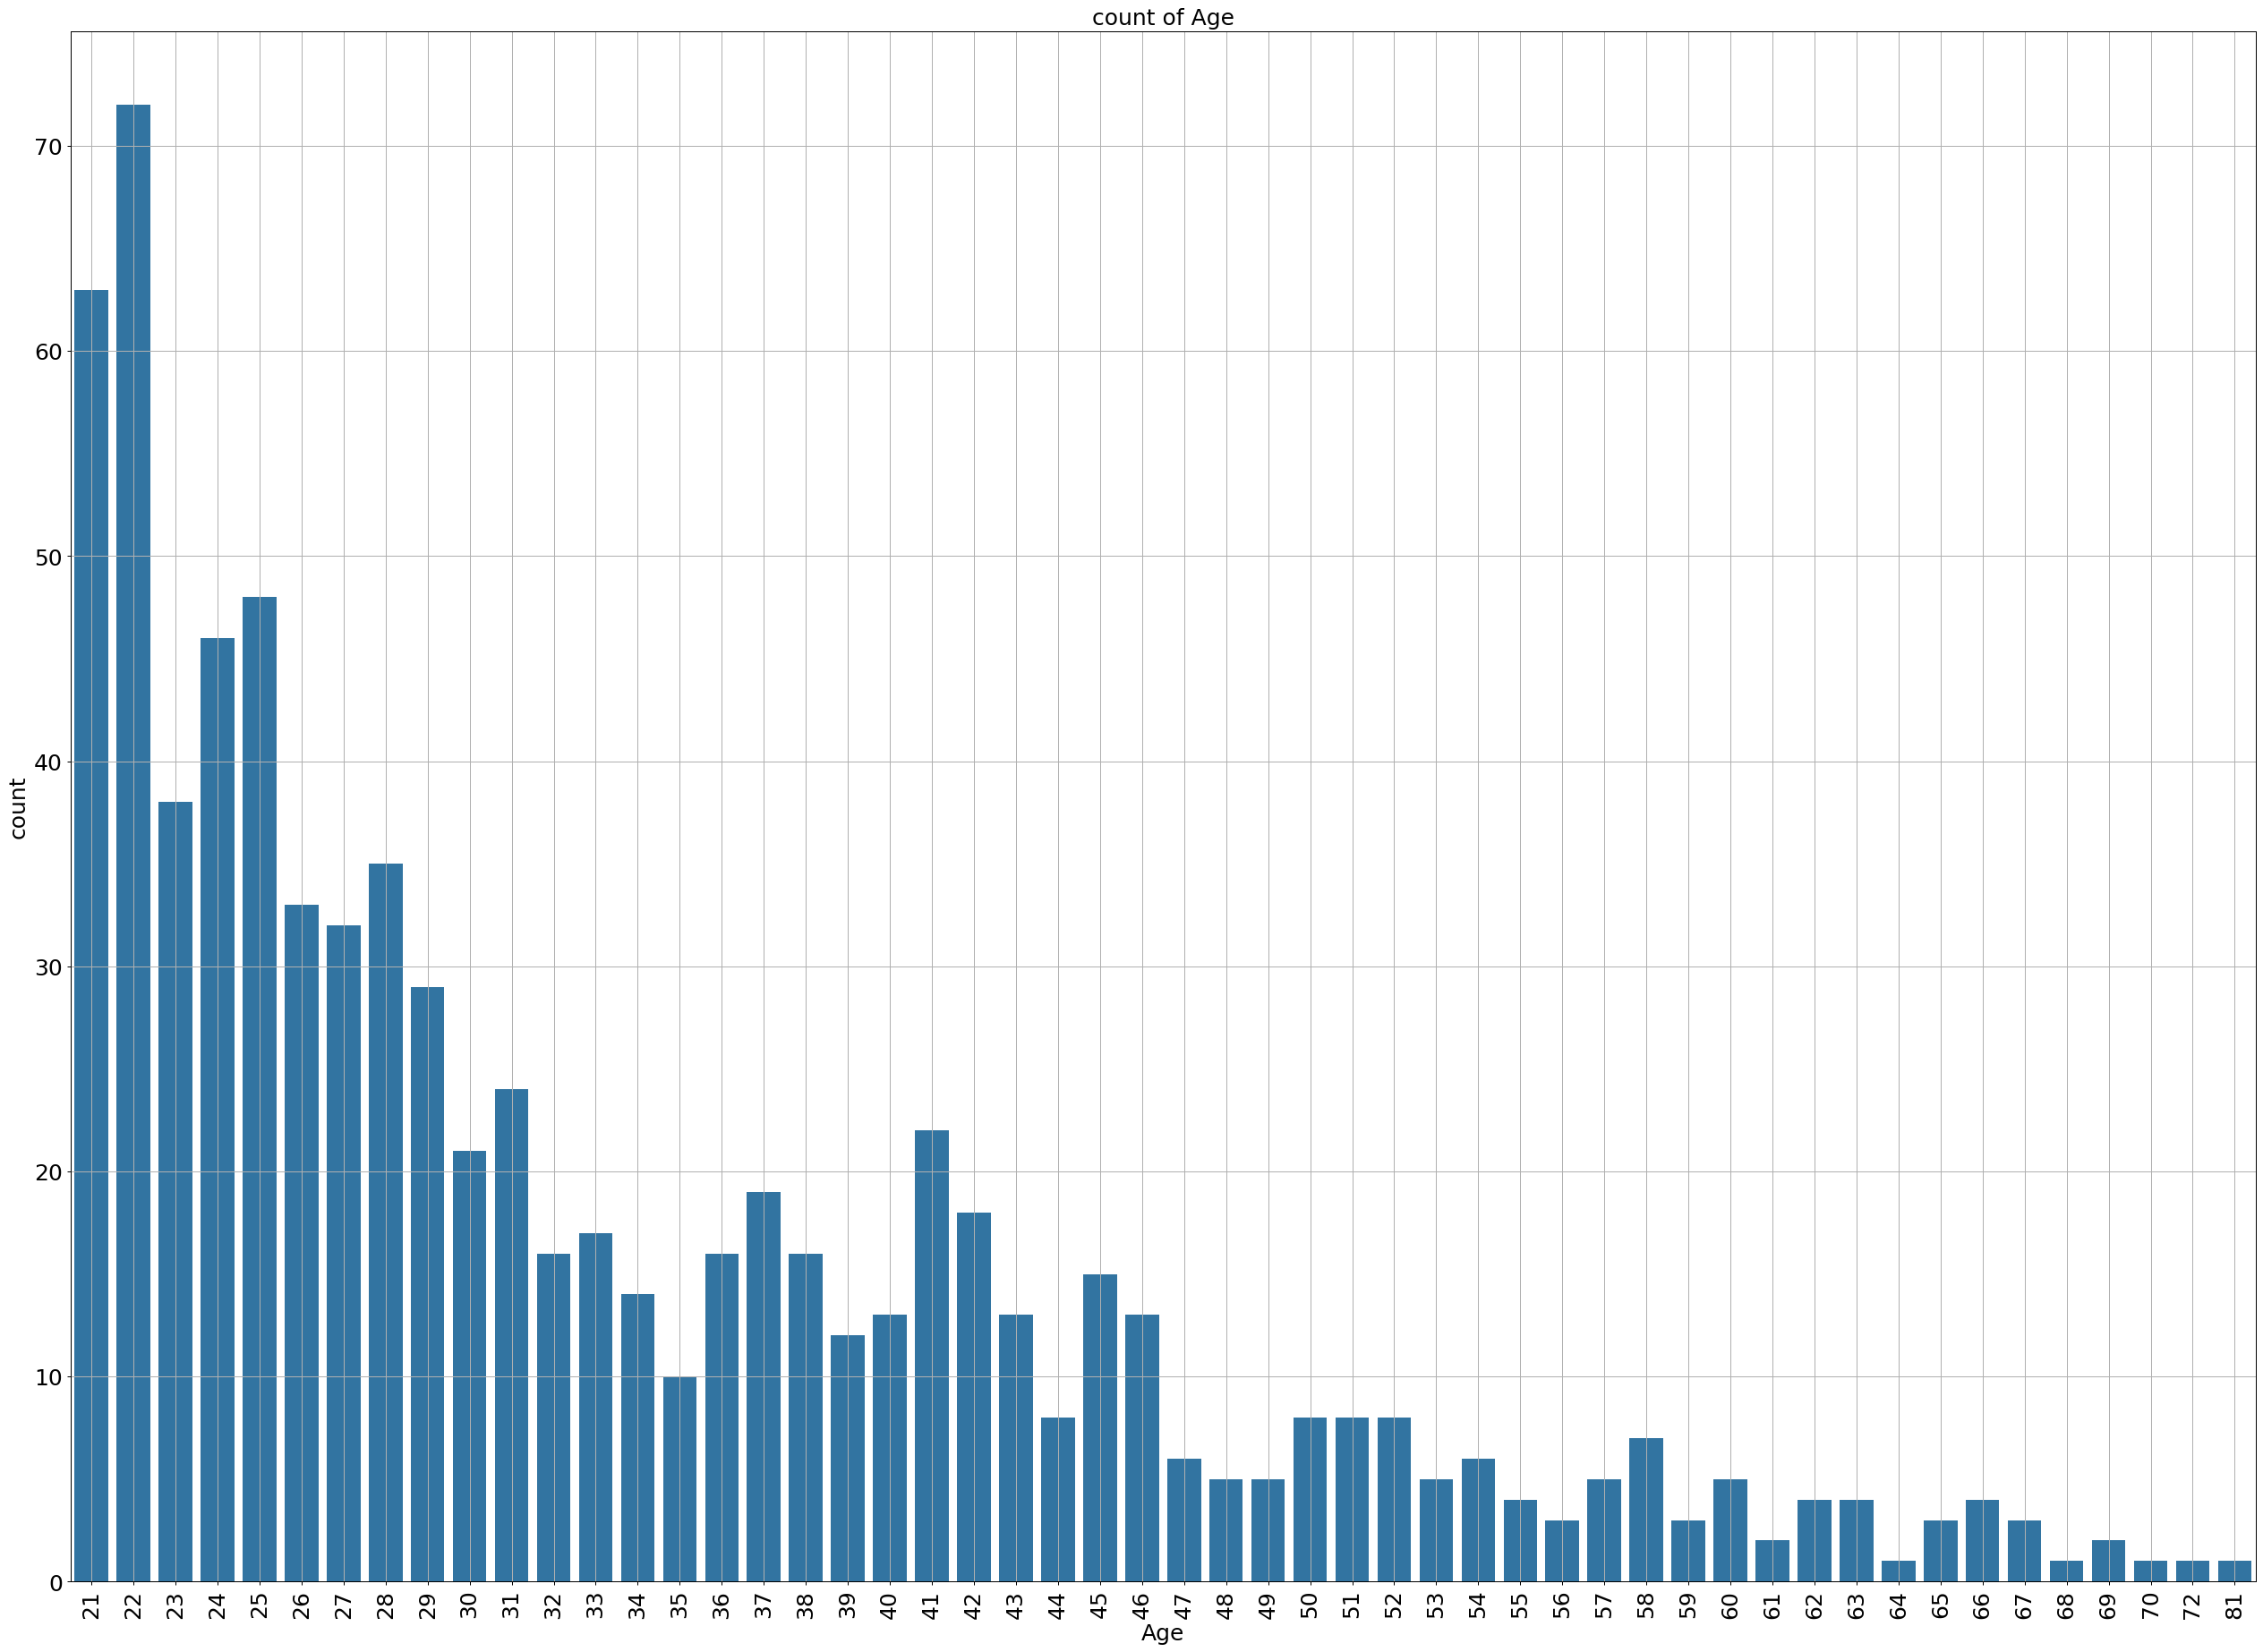

In [14]:
plt.figure(figsize=(35,25),dpi=90)
ax = sns.countplot (x='Age',data=df)
plt.xticks(rotation=90 ,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('count of Age',fontsize=20)
plt.grid()

In [15]:
#hazfe soton 0
df1 = df[df['SkinThickness']>0]
df1 = df1[df1['SkinThickness']<90]
df1

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
6,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...
761,170,74,31,0,44.0,0.403,43,1
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0


In [16]:
df2 = df1.dropna(how='any')
df2.reset_index(drop=True,inplace=True)
df2

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,89,66,23,94,28.1,0.167,21,0
3,137,40,35,168,43.1,2.288,33,1
4,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...
535,170,74,31,0,44.0,0.403,43,1
536,101,76,48,180,32.9,0.171,63,0
537,122,70,27,0,36.8,0.340,27,0
538,121,72,23,112,26.2,0.245,30,0


# ML 

In [17]:
x = df2.drop('Outcome' , axis=1)
y = df2['Outcome'].values.reshape(-1,1)

In [18]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.35 , random_state=0)

In [19]:
clf = GaussianNB()
clf.fit(x_train,y_train.ravel())  #ravel braye ine ke bad ejraye cod khata nade
y_pred = clf.predict(x_test)

In [20]:
print('accuracy:' , accuracy_score(y_test , y_pred))

accuracy: 0.7671957671957672


In [21]:
clf.classes_

array([0, 1], dtype=int64)

In [22]:
confusion_matrix(y , clf.predict(x))

array([[301,  60],
       [ 65, 114]], dtype=int64)

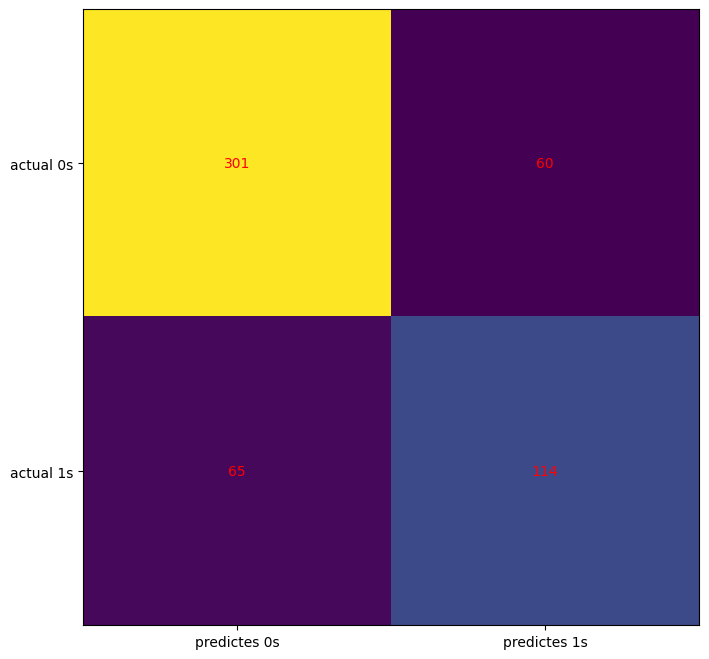

In [23]:
cm = confusion_matrix(y , clf.predict(x))
fig,ax = plt.subplots(figsize=(8 , 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('predictes 0s','predictes 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('actual 0s','actual 1s'))
ax.set_ylim (1.5 , -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j , i,cm[i,j], ha='center' , va='center' , color='red')
plt.show()

In [24]:
print (classification_report(y ,clf.predict(x)))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       361
           1       0.66      0.64      0.65       179

    accuracy                           0.77       540
   macro avg       0.74      0.74      0.74       540
weighted avg       0.77      0.77      0.77       540



In [25]:
p1 = clf.predict([[60,32,43,93,29.7,0.371,60]])
p1

C:\Users\LavaN-32428068\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [26]:
k_fold = KFold(5)
print (cross_val_score(clf , x,y.ravel() , cv=k_fold , n_jobs=1))

[0.7962963  0.66666667 0.75       0.78703704 0.77777778]


# improve my learning

In [27]:
df3 = df2.drop(df2.index[range(108,216)])
df3.reset_index(drop=True,inplace=True)
df3

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,89,66,23,94,28.1,0.167,21,0
3,137,40,35,168,43.1,2.288,33,1
4,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...
427,170,74,31,0,44.0,0.403,43,1
428,101,76,48,180,32.9,0.171,63,0
429,122,70,27,0,36.8,0.340,27,0
430,121,72,23,112,26.2,0.245,30,0


In [28]:
x = df3.drop('Outcome' , axis=1).values
y = df3.Outcome.values.reshape(-1,1)

In [29]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.35 , random_state=0)

In [30]:
clf = GaussianNB()
clf.fit(x_train,y_train.ravel())  #ravel braye ine ke bad ejraye cod khata nade
y_pred = clf.predict(x_test)

In [31]:
print('accuracy:' , accuracy_score(y_test , y_pred))

accuracy: 0.7302631578947368


In [32]:
k_fold = KFold(5)
print (cross_val_score(clf , x,y.ravel() , cv=k_fold , n_jobs=1))

[0.77011494 0.75862069 0.74418605 0.86046512 0.75581395]


In [33]:
confusion_matrix(y , clf.predict(x))

array([[252,  45],
       [ 47,  88]], dtype=int64)